# A notebook to determine correlations on constant-slope strings

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from growthrates import *

In [3]:
def nth_correlator(S, n):
    N = len(S)
    m = (S[-1] - S[0])/(N-1)
    Cij = 0
    for i in range(n):
        Cij += (S[i-n] - S[i-1-n]) * (S[i+1] - S[i])
    for i in range(1, N-n):
        Cij += (S[i] - S[i-1]) * (S[i+n] - S[i+n-1])
    return Cij/(N-1)

def get_correlator(S):
    N = len(S)
    m = (S[-1] - S[0])/(N-1)
#     print(m)
    Cij = (S[-1] - S[-2]) * (S[1] - S[0])
    for i in range(1, N-1):
        Cij += (S[i] - S[i-1]) * (S[i+1] - S[i])
    return Cij/(N-1)

In [9]:
S = reset_S(100, -.8)
print(S)
get_correlator(S) - (.8)**2

[  0.  -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9. -10. -11. -12. -11. -12.
 -13. -14. -15. -16. -17. -18. -19. -20. -21. -22. -23. -24. -25. -26. -27.
 -28. -29. -30. -31. -32. -33. -34. -35. -36. -35. -34. -35. -36. -37. -38.
 -39. -40. -41. -42. -43. -44. -45. -46. -45. -44. -45. -46. -47. -48. -49.
 -50. -51. -52. -53. -54. -55. -56. -57. -58. -59. -60. -61. -62. -61. -62.
 -63. -64. -65. -66. -67. -66. -65. -66. -67. -68. -69. -70. -71. -72. -73.
 -74. -75. -76. -77. -78. -79. -80. -81. -82. -83.]


0.15797979797979789

# 1-Stair

In [38]:
N = 101
Steps = 10
n = 1
trials = 100
Nms = 21
finalCors   = np.zeros((trials*Steps, Nms))
ms = np.linspace(-1, 1, Nms)

for i in range(Nms):
    S = reset_S(N, ms[i])
    for j in range(Steps):
        S = stair_update_S(S, n)
    for j in range(trials):
        for k in range(Steps):
            S = stair_update_S(S, n)
            finalCors[j*Steps + k, i] = get_correlator(S) - ms[i]**2

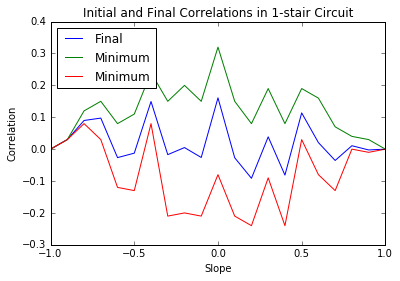

In [39]:
# Correlations
plt.plot(ms, np.mean(finalCors, axis=0), label="Final")
plt.plot(ms, finalCors.max(axis=0), label="Minimum")
plt.plot(ms, finalCors.min(axis=0), label="Minimum")
# plt.plot(ms[ind], initialCors[ind], label="Initial")
plt.legend(loc=2)
plt.xlabel("Slope")
plt.ylabel("Correlation")
plt.title("Initial and Final Correlations in 1-stair Circuit")
# plt.savefig("../figures/correlations/1stairCorrel.pdf")
plt.show()

# 2-Stair

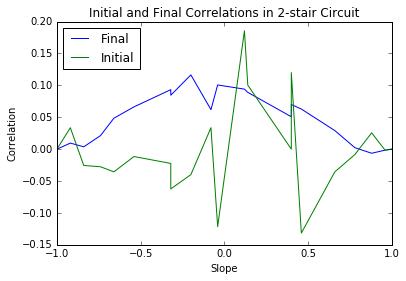

In [6]:
N = 101
Steps = 100
n = 2
trials = 100
# Nms = 21
ts = np.arange(Steps+1)
initialCors = np.zeros(Nms)
finalCors   = np.zeros(Nms)
ms = np.linspace(-1, 1, Nms)

for i in range(Nms):
    S = reset_S(N, ms[i])
#     print(ms[i], (S[-1] - S[0])/(N-1))
    ms[i] = (S[-1] - S[0])/(N-1)
    initialCors[i] = get_correlation(S)
    correlSum = 0
    for j in range(Steps):
        S = stair_update_S(S, n)
    for j in range(trials):
        correls = np.array([get_correlation(S)])
        for k in range(Steps):
            S = stair_update_S(S, n)
            correls = np.append(correls, get_correlation(S))
        
        correlSum += np.average(correls)
    finalCors[i] = correlSum/trials

# Correlations
ind = np.argsort(ms)
plt.plot(ms[ind], finalCors[ind], label="Final")
plt.plot(ms[ind], initialCors[ind], label="Initial")
plt.legend(loc=2)
plt.xlabel("Slope")
plt.ylabel("Correlation")
plt.title("Initial and Final Correlations in 2-stair Circuit")
plt.savefig("../figures/correlations/2stairCorrel.pdf")
plt.show()

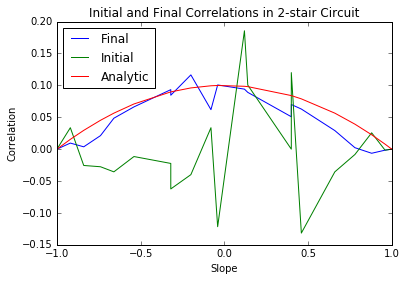

In [9]:
# Correlations
ind = np.argsort(ms)
plt.plot(ms[ind], finalCors[ind], label="Final")
plt.plot(ms[ind], initialCors[ind], label="Initial")
plt.plot(ms[ind], .1-.1*(ms[ind])**2, label="Analytic")
plt.legend(loc=2)
plt.xlabel("Slope")
plt.ylabel("Correlation")
plt.title("Initial and Final Correlations in 2-stair Circuit")
# plt.savefig("../figures/correlations/2stairCorrel.pdf")
plt.show()

# 3-Stair

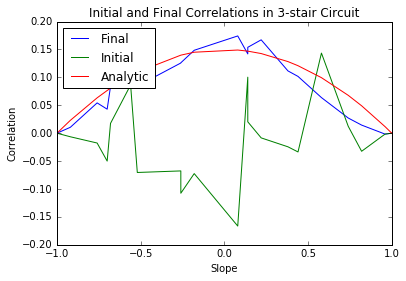

In [10]:
N = 101
Steps = 100
n = 3
trials = 100
# Nms = 21
ts = np.arange(Steps+1)
initialCors = np.zeros(Nms)
finalCors   = np.zeros(Nms)
ms = np.linspace(-1, 1, Nms)

for i in range(Nms):
    S = reset_S(N, ms[i])
#     print(ms[i], (S[-1] - S[0])/(N-1))
    ms[i] = (S[-1] - S[0])/(N-1)
    initialCors[i] = get_correlation(S)
    correlSum = 0
    for j in range(Steps):
        S = stair_update_S(S, n)
    for j in range(trials):
        correls = np.array([get_correlation(S)])
        for k in range(Steps):
            S = stair_update_S(S, n)
            correls = np.append(correls, get_correlation(S))
        
        correlSum += np.average(correls)
    finalCors[i] = correlSum/trials

# Correlations
ind = np.argsort(ms)
plt.plot(ms[ind], finalCors[ind], label="Final")
plt.plot(ms[ind], initialCors[ind], label="Initial")
plt.legend(loc=2)
plt.xlabel("Slope")
plt.ylabel("Correlation")
plt.title("Initial and Final Correlations in 3-stair Circuit")
plt.savefig("../figures/correlations/3stairCorrel.pdf")
plt.show()

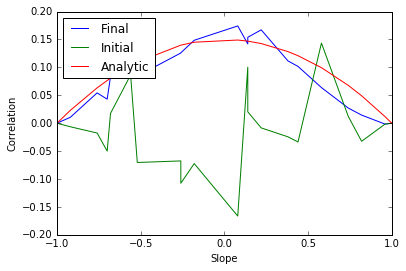

In [13]:
# Correlations
ind = np.argsort(ms)
plt.plot(ms[ind], finalCors[ind], label="Final")
plt.plot(ms[ind], initialCors[ind], label="Initial")
plt.plot(ms[ind], .15-.15*(ms[ind])**2, label="Analytic")
plt.legend(loc=2)
plt.xlabel("Slope")
plt.ylabel("Correlation")
# plt.title("Initial and Final Correlations in 3-stair Circuit")
plt.savefig("../figures/correlations/3stairCorrel.pdf")
plt.show()

In [125]:
print(totcorrels)

[ 0.          0.03004639  0.10212535  0.14300141  0.17623108  0.16115259
  0.15114761  0.10278561  0.06000771  0.02039337  0.        ]


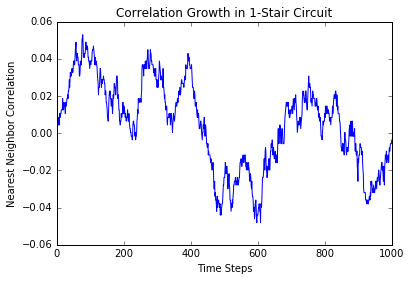

In [167]:
N = 100
Steps = 1000
n = 1
trials = 20
slopes = np.array([])
ts = np.arange(Steps+1)
totcorrels = np.zeros(Steps+1)

for m in range(trials):
    S = reset_S(N, 0)
    correls = np.array([get_correlation(S)])
    for i in range(Steps):
        S = stair_update_S(S, n)
        correls = np.append(correls, get_correlation(S))
    
    totcorrels += correls
        
totcorrels /= trials
plt.plot(ts, totcorrels)
plt.title("Correlation Growth in 1-Stair Circuit")
plt.xlabel("Time Steps")
plt.ylabel("Nearest Neighbor Correlation")
plt.savefig("../figures/correlations/corrgrowth.pdf")
plt.show()

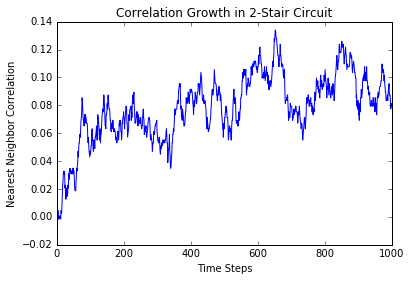

In [182]:
N = 100
Steps = 1000
n = 2
trials = 20
slopes = np.array([])
ts = np.arange(Steps+1)
totcorrels = np.zeros(Steps+1)

for m in range(trials):
    S = reset_S(N, 0)
    correls = np.array([get_correlation(S)])
    for i in range(Steps):
        S = stair_update_S(S, n)
        correls = np.append(correls, get_correlation(S))
    
    totcorrels += correls
        
totcorrels /= trials
plt.plot(ts, totcorrels)
plt.title("Correlation Growth in 2-Stair Circuit")
plt.xlabel("Time Steps")
plt.ylabel("Nearest Neighbor Correlation")
plt.savefig("../figures/correlations/corrgrowth2.pdf")
plt.show()

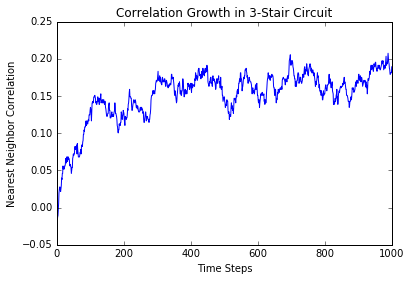

In [189]:
N = 100
Steps = 1000
n = 3
trials = 20
slopes = np.array([])
ts = np.arange(Steps+1)
totcorrels = np.zeros(Steps+1)

for m in range(trials):
    S = reset_S(N, 0)
    correls = np.array([get_correlation(S)])
    for i in range(Steps):
        S = stair_update_S(S, n)
        correls = np.append(correls, get_correlation(S))
    
    totcorrels += correls
        
totcorrels /= trials
plt.plot(ts, totcorrels)
plt.title("Correlation Growth in 3-Stair Circuit")
plt.xlabel("Time Steps")
plt.ylabel("Nearest Neighbor Correlation")
plt.savefig("../figures/correlations/corrgrowth3.pdf")
plt.show()

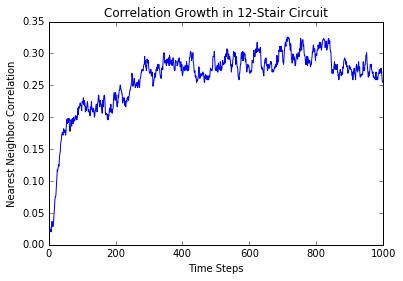

In [191]:
N = 100
Steps = 1000
n = 12
trials = 20
slopes = np.array([])
ts = np.arange(Steps+1)
totcorrels = np.zeros(Steps+1)

for m in range(trials):
    S = reset_S(N, 0)
    correls = np.array([get_correlation(S)])
    for i in range(Steps):
        S = stair_update_S(S, n)
        correls = np.append(correls, get_correlation(S))
    
    totcorrels += correls
        
totcorrels /= trials
plt.plot(ts, totcorrels)
plt.title("Correlation Growth in 12-Stair Circuit")
plt.xlabel("Time Steps")
plt.ylabel("Nearest Neighbor Correlation")
plt.savefig("../figures/correlations/corrgrowth12.pdf")
plt.show()

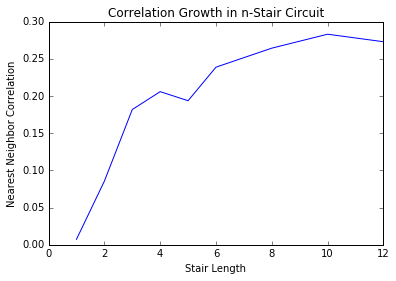

In [223]:
ns = [1,2,3,4,5,6,8,10,12]
N = 100
Steps = 20
trials = 1000
slopes = np.array([])
ts = np.arange(Steps+1)
avgcorrels = np.zeros(len(ns))

for idx, n in enumerate(ns):
    totcorrels = np.zeros(Steps+1)
    S = reset_S(N, 0)
    # evolve away from initial conditions
    for i in range(200):
        S = stair_update_S(S, n)
    for j in range(trials):
        correls = np.array([get_correlation(S)])
        # get correlations often
        for i in range(Steps):
            S = stair_update_S(S, n)
            correls = np.append(correls, nth_correlation(S,1))

        totcorrels += correls
    avgcorrels[idx] = np.average(totcorrels)/trials
plt.plot(ns, avgcorrels)
plt.title("Correlation Growth in n-Stair Circuit")
plt.xlabel("Stair Length")
plt.ylabel("Nearest Neighbor Correlation")
plt.savefig("../figures/correlations/corr1-of-n.pdf")
plt.show()

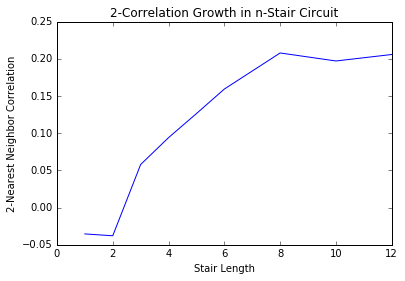

In [224]:
ns = [1,2,3,4,5,6,8,10,12]
N = 100
l = 2
Steps = 20
trials = 1000
slopes = np.array([])
ts = np.arange(Steps+1)
avgcorrels = np.zeros(len(ns))

for idx, n in enumerate(ns):
    totcorrels = np.zeros(Steps+1)
    S = reset_S(N, 0)
    # evolve away from initial conditions
    for i in range(200):
        S = stair_update_S(S, n)
    for j in range(trials):
        correls = np.array([nth_correlation(S,l)])
        # get correlations often
        for i in range(Steps):
            S = stair_update_S(S, n)
            correls = np.append(correls, nth_correlation(S,l))

        totcorrels += correls
    avgcorrels[idx] = np.average(totcorrels)/trials
plt.plot(ns, avgcorrels)
plt.title(str(l)+"-Correlation Growth in n-Stair Circuit")
plt.xlabel("Stair Length")
plt.ylabel(str(l)+"-Nearest Neighbor Correlation")
plt.savefig("../figures/correlations/corr"+str(l)+"-of-n.pdf")
plt.show()

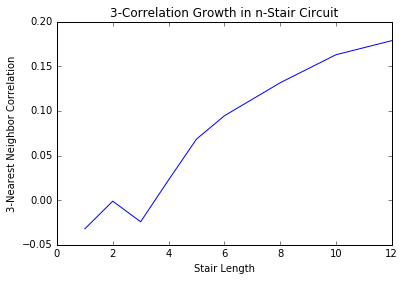

In [225]:
ns = [1,2,3,4,5,6,8,10,12]
N = 100
l = 3
Steps = 20
trials = 1000
slopes = np.array([])
ts = np.arange(Steps+1)
avgcorrels = np.zeros(len(ns))

for idx, n in enumerate(ns):
    totcorrels = np.zeros(Steps+1)
    S = reset_S(N, 0)
    # evolve away from initial conditions
    for i in range(200):
        S = stair_update_S(S, n)
    for j in range(trials):
        correls = np.array([nth_correlation(S,l)])
        # get correlations often
        for i in range(Steps):
            S = stair_update_S(S, n)
            correls = np.append(correls, nth_correlation(S,l))

        totcorrels += correls
    avgcorrels[idx] = np.average(totcorrels)/trials
plt.plot(ns, avgcorrels)
plt.title(str(l)+"-Correlation Growth in n-Stair Circuit")
plt.xlabel("Stair Length")
plt.ylabel(str(l)+"-Nearest Neighbor Correlation")
plt.savefig("../figures/correlations/corr"+str(l)+"-of-n.pdf")
plt.show()

/Users/cstahl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


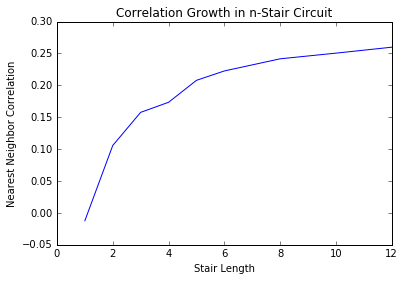

In [222]:
ns = [1,2,3,4,5,6,8,10,12]
N = 100
Steps = 1000
trials = 20
slopes = np.array([])
ts = np.arange(Steps+1)
avgcorrels = np.zeros(len(ns))

for idx, n in enumerate(ns):
    totcorrels = np.zeros(Steps+1)
    for m in range(trials):
        S = reset_S(N, 0)
        correls = np.array([get_correlation(S)])
        for i in range(Steps):
            S = stair_update_S(S, n)
            correls = np.append(correls, get_correlation(S))

        totcorrels += correls
    avgcorrels[idx] = np.average(totcorrels[.5*Steps:])/trials
plt.plot(ns, avgcorrels)
plt.title("Correlation Growth in n-Stair Circuit")
plt.xlabel("Stair Length")
plt.ylabel("Nearest Neighbor Correlation")
# plt.savefig("../figures/correlations/corr1-of-n.pdf")
plt.show()

-0.000145454545455
-0.000339393939394


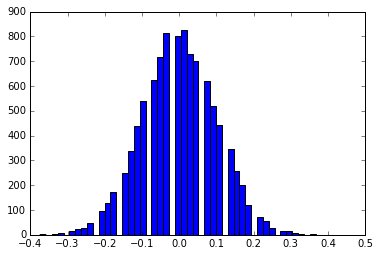

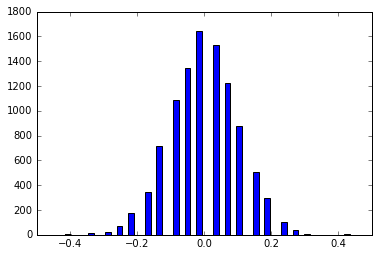

In [15]:
N = 10000
L = 100
m_start = 0
m = []
c = []
for i in range(N):
    S = reset_S(L, m_start)
    m.append((S[-1] - S[0])/(L-1))
    c.append(nth_correlator(S,10) - m_start**2)
#     print(get_correlation(S) == nth_correlation(S,1))
print(np.average(c))
print(np.average(m))
plt.hist(np.array(m), 50)
plt.show()
plt.hist(np.array(c), 50)
plt.show()

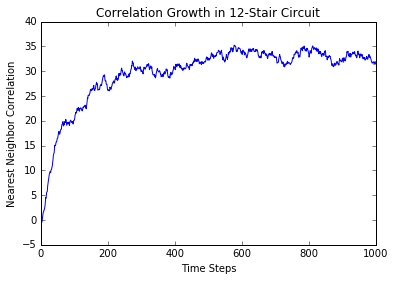

In [202]:
plt.plot(ts, totcorrels)
plt.title("Correlation Growth in 12-Stair Circuit")
plt.xlabel("Time Steps")
plt.ylabel("Nearest Neighbor Correlation")

In [197]:
trials

20

In [198]:
n

12